# Matplotlib plotting Master Notebook

## Objetivo

El objetivo de este notebook es recopilar gráficos realizados con la librería matplotlib y el paso a paso bien documentado para replicarlo con cualquier tipo de datos y poder reciclar código.

Adicionalmente, se incluye descripción de cada tipo de visualización para su utilización.

__Nota__: Esta notebook surge de la necesidad personal de reforzar el uso de visualizaciones, gran parte de las visualiaciones no son originalmente hechas por mi sino que son recopilados desde distintas fuentes.

El objetivo es tener un recurso en español, comentado línea a línea.

A continuación, listo los recursos utilizados:

__Plotting with Python: learn 80 plots STEP by STEP__ 

- https://www.kaggle.com/python10pm/plotting-with-python-learn-80-plots-step-by-step/log

__Top 50 matplotlib visualizations__ 

- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

### Un gráfico efectivo:
#### - Transmite la información correcta y necesaria sin distorsionar los hechos.
#### - De diseño simple, no tienes que esforzarte para conseguirlo.
#### - No sobrecargado de información.

# Indíce

## Gráficos de correlación

- [1. Scatter plot](#Scatter-plot)
- [2. Bubble plot](#Bubble-plot)
- [3. Bubble plot with encircling](#Bubble-plot-with-encircling)
- [4. Scatter plot con linea de regresión](#Scatter-plot-con-linea-de-regresión)
- [5. Count Plot](#Count-Plot)

## Gráficos de Composición / Grupos

- [1. Bar chart](#Bar-chart)

## Gráficos de Variación

- [1. Series de tiempo](#Series-de-tiempo)

## Understanding the basics of matplotlib

#### figure, subplots, and axes:

![title](image1.png)


The figure is basically the canvas or a box where we can store all our plots/charts. It is the highest hierarchy.

The next in the row is the axes. Axes basically means the composition where our plot will live.

Axes is not the same as axis. Actually every axes contains __x__ axis an __y__ axis.

In matplotlib, you can do different plots with different methodologies. Doing the exact same plot can be achieved in multiple ways. We will use the __OOP approach of plotting in matplotlib__.

In [ ]:
# Main imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib

from IPython.display import Image

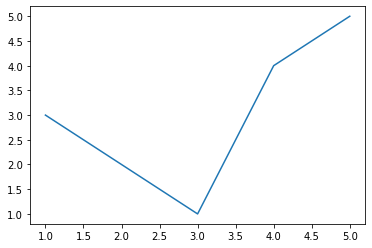

In [72]:
# Crear figura
fig = plt.figure()

# agregar subplot de forma explicita

ax1 = fig.add_subplot(1, 1, 1) # 1 axes en 1 row 1 columna.

# datos
x = [1, 2, 3, 4, 5]
y = [3, 2, 1, 4, 5]

# graficar
ax1.plot(x, y)

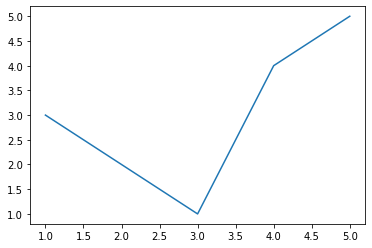

In [73]:
# podemos realizar el mismo gráfico de la siguiente forma
fig = plt.figure()
ax1 = fig.subplots()
ax1.plot(x,y)

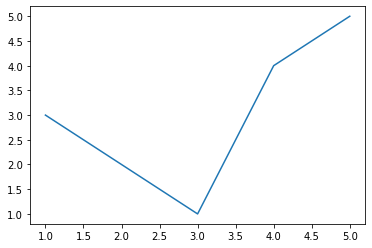

In [74]:
# Podemos simplificar más
plt.plot(x, y)

Puede parecer una pérdida de tiempo escribir 3 líneas en vez de 1 para llegar al mismo resultado, la mayoría de las veces podemos usar solo __plt.plot(x,y)__ para hacer gráficos simples. Sin embargo, la forma explicita (1) nos permitirá reutilizar más código con más frecuencia y añade más control sobre el gráfico.

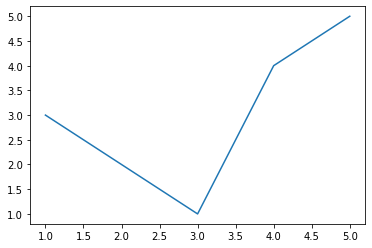

In [75]:
# Podemos llegar al mismo resultado aun de más maneras
ax1 = plt.axes()
ax1.plot(x, y)

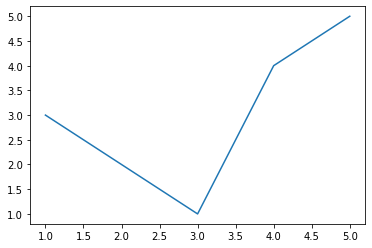

In [76]:
# usando plt.subplot
ax1 = plt.subplot() # distinto de subplots
ax1.plot(x,y)

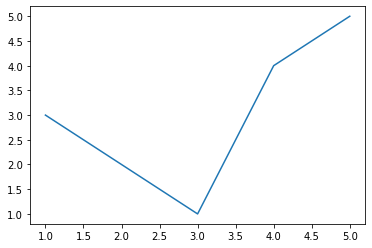

In [77]:
# usando add_axes()

# creamos figura
fig = plt.figure()

# agregamos axes
fig.add_axes()

# gca es "get current axes", ya que matplotlib plotea en los axes actuales
ax1 = plt.gca()

# plot
ax1.plot(x, y)

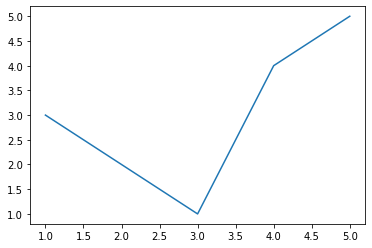

In [78]:
# o podemos usar simplemente axes()
ax1 = plt.axes()
ax1.plot(x, y)

#### Hay muchas maneras de realizar la misma tarea debido a la arquitectura de matplotlib.

![title](image2.png)

- 1. El nivel más bajo es __back end layer__ Por ejemplo, en Jupyter notebooks podemos usar __%matplotlib inline__ que ordena al back end layer renderizar los gráficos sin necesidad de llamar __plt.show()__. También se puede usar el back end layer para especificar que motor usar para renderizar (hvplot, jshtml). Es una de las pocas ocasiones en la que se interactúa con este nivel.


 - 2. __Artist Layer__, nos da la posibilidad de realizar cambios en el gráfico (colores, ejes, etc). Podemos acceder a esta capa cuando llamamos __ax1.plot()__. Cuando realizamos gráficos de esta forma, estamos usando el método __OOP__.
 
 
 - 3. La última capa es muy util para gráficos rápidos. La utilizamos por ejemplo, llamando __plt.plot()__.
 
 Como podemos ver, dependiendo del estilo que ocupemos, estaremos usando distintas capas y esto impacta en la forma de hacer las cosas.
 
 Todos estos métodos producen el mismo resultado cuando creamos un solo gráfico, al generar varios gráficos simultaneamente la metodología cambia.

Por ejemplo, queremos 4 gráficos en formato 2 x 2:

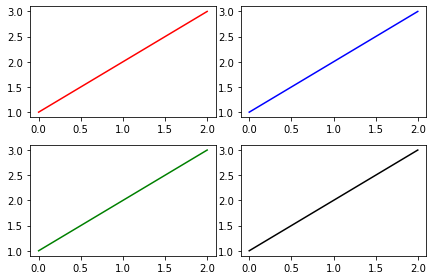

In [79]:
# Creamos figura
fig = plt.figure()

# Creamos 4 gráficos usando tuple unpacking para nombrar a cada uno

(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)

ax1.plot([1,2,3], color = 'r')
ax2.plot([1,2,3], color = 'b')
ax3.plot([1,2,3], color = 'g')
ax4.plot([1,2,3], color = 'black')

plt.tight_layout()

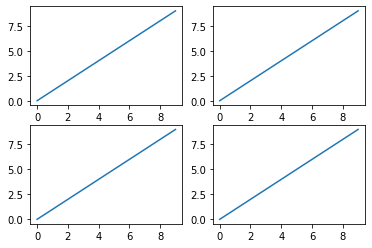

In [80]:
# Podemos hacer lo mismo utilizando un for loop

nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows, ncols)

# los axes son una tupla como vimos en la forma anterior

for row in range(nrows):
    for column in range(ncols):
        ax = axes[row, column]
        ax.plot(np.arange(10))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


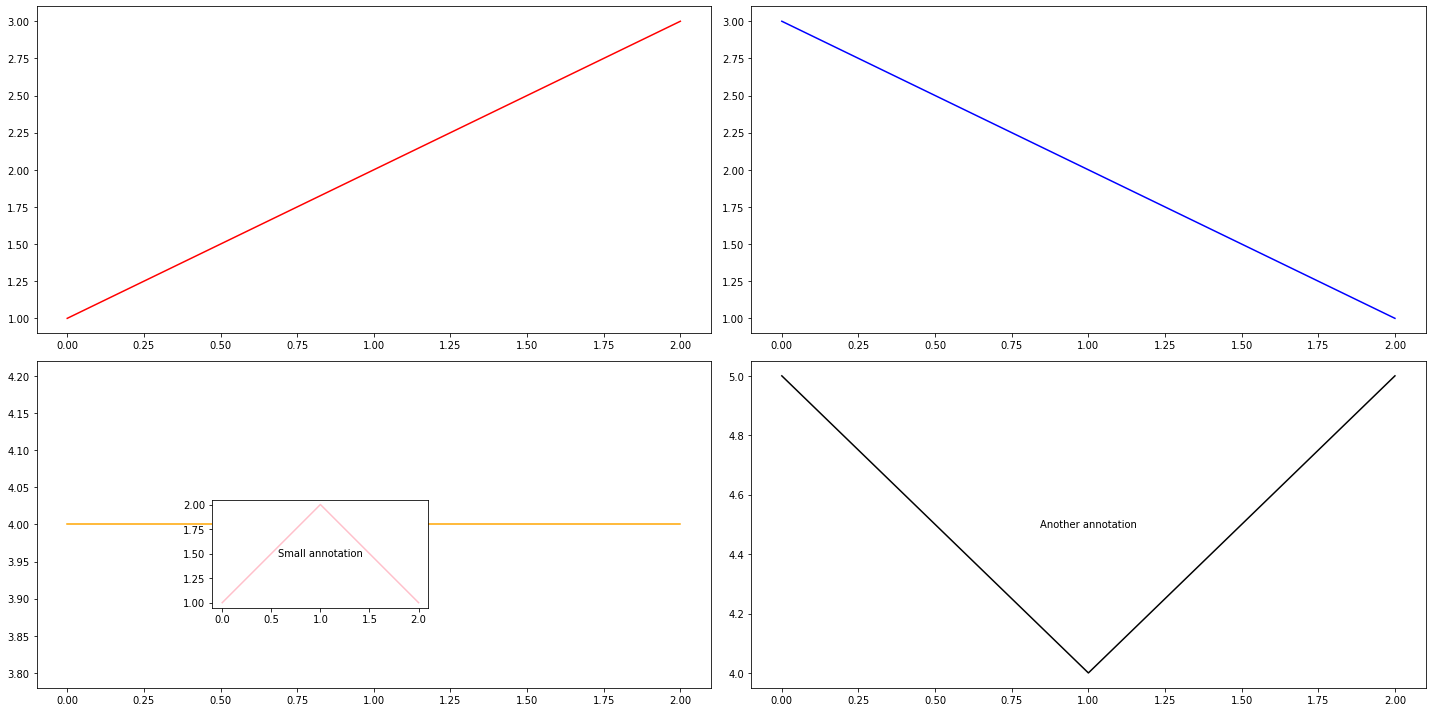

In [81]:
# Un ejemplo más loco

# Creamos figura
fig = plt.figure(figsize = (20, 10))

# Creamos 4 gráficos y usamos unpacking de tuplas para nombrarlos
(ax1, ax2), (ax3, ax4) = fig.subplots(2, 2)

# ax1
ax1.plot([1, 2, 3], color = 'r')

# ax2
ax2.plot([3,2,1], color = 'b')

# ax3
ax3.plot([4, 4, 4], color = 'orange')

ax3_bis = fig.add_axes([0.15, 0.15, 0.15, 0.15])
ax3_bis.plot([1, 2, 1], color = 'pink')

# annotation
ax3_bis.annotate("Small annotation",
                xy = (0.5, 0.5),
                xycoords = 'axes fraction',
                va = 'center',
                ha = 'center')

# ax4
ax4.plot([5, 4, 5], color = 'black')

ax4.annotate('Another annotation',
            xy = (0.5, 0.5), # fracción de ax4, la ponemos en el centro
            xycoords = 'axes fraction', # nosotros podemos especificar los datos  de x e y
            va = 'center',
            ha = 'center')

plt.tight_layout()

# Importamos datos

In [82]:
path = "https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv"

data = pd.read_csv(path)
data.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


## Scatter plot

[Volver a indice](#Indíce)

Scatteplot es un gráfico clásico y fundamental que se utiliza para estudiar la relación entre dos variables. Si tiene varios grupos en sus datos, es posible que desee visualizar cada grupo en un color diferente. En matplotlib, puede hacer esto convenientemente usando plt.scatterplot ().

Más info: https://en.wikipedia.org/wiki/Scatter_plot

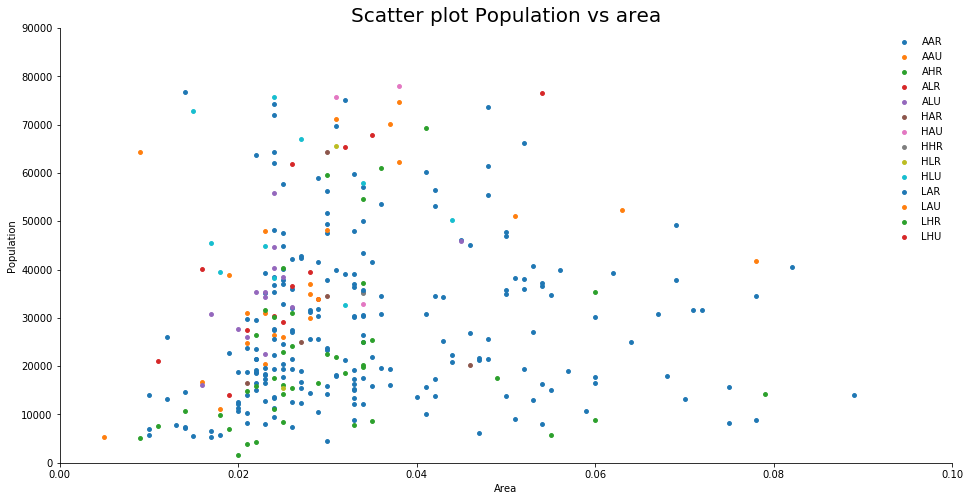

In [83]:
# Visualiza relación entre los datos

# Instanciamos figura
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(1, 1, 1)

# iteramos sobre cada categoría de los datos. De esta manera, cada una tendrá su propio color.

for cat in sorted(list(data['category'].unique())):
    
    # filtramos el x e y para cada categoría
    ar = data[data['category']== cat]['area']
    pop = data[data['category']== cat]['poptotal']
    
    # plot
    ax.scatter(ar, pop, label = cat, s = 15) # s --> size 
    
# Le damos más estética al mapa

# Eliminamos 2/4 bordes 
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")

# Agregamos etiqueta a cada ax
ax.set_xlabel('Area') # Nombre de eje X 
ax.set_ylabel('Population') # Nombre de eje Y

# cambiamos los límites del gráfico, esto nos permitirá ver la leyenda al lado izquierdo
ax.set_ylim(0, 90000) # Limites eje Y
ax.set_xlim(0, 0.1) # Limites eje X
ax.set_title('Scatter plot Population vs area', size = 20) # Titulo
ax.legend(loc = 'upper right', fontsize = 10, frameon=False) # Podemos sacarle el "Frame"

## Bubble plot

[Volver a indice](#Indíce)

Cada punto de este tipo de gráfico tiene un tamaño definido por los datos

https://en.wikipedia.org/wiki/Scatter_plot

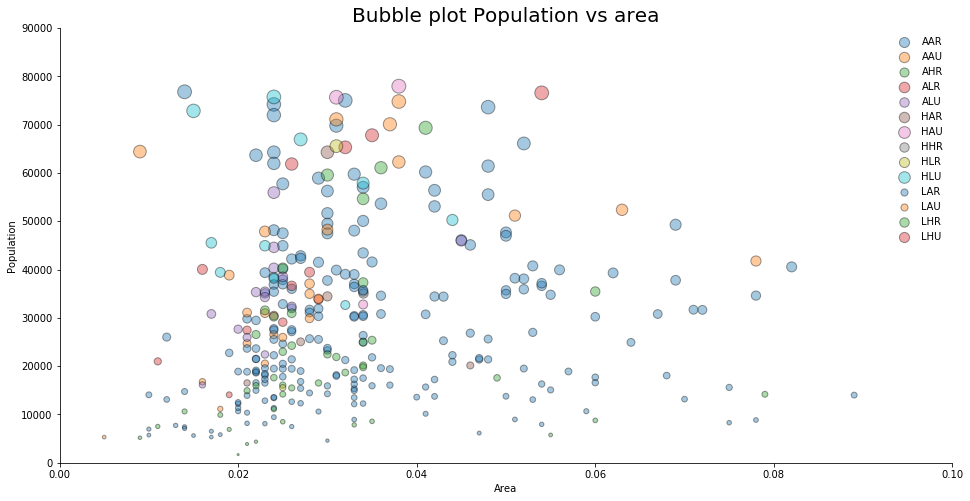

In [84]:
# Instanciamos la figura
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) # Con esto ya tenemos la figura

# Preparamos datos
# En este caso necesitamos el total de la columna de población, la cual es la métrica que vamos a medir
size_total = data['poptotal'].sum()

# Iteramos por todas las categoria, asignandole un color y marcador a cada una:
for cat in sorted(data['category'].unique()):
    
    # filtramos el x e y para cada categoría
    ar = data[data['category']== cat]['area']
    pop = data[data['category']== cat]['poptotal']
    
    # Aqui calculamos el tamaño especifico de cata categoria, esta es la clave de este gráfico
    size = pop/size_total # Mientras más grande esta proporción, más grande será el marcador
    
    # Gráficamos, especificando 's = size' y 'marker = marker'
    # 'alpha' es la opacidad de los puntos [0,1], siendo 1 el predeterminado
    # Se puede experimentar con el tipo de marker
    
    ax.scatter(ar, pop, label = cat, s = size*100000, marker = '.', 
               alpha = 0.4, # opacidad
              edgecolors = 'black') # color de los bordes de cada punto
    
# Styling
# Eliminar spines
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# Axis Labels
ax.set_xlabel("Area")
ax.set_ylabel("Population")

# Limites de cada eje
ax.set_ylim(0, 90000) # Limites eje Y
ax.set_xlim(0, 0.1) # Limites eje X

# Titulo
ax.set_title('Bubble plot Population vs area', size = 20) # Titulo

# Leyenda, sin marco --> podemo eliminar ese argumento o simplemente asignarle True en el caso que eramos marco
ax.legend(loc = 'upper right', fontsize = 10, frameon=False) # Podemos sacarle el "Frame"

## Bubble plot with encircling

[Volver a indice](#Indíce)

A veces, desea mostrar un grupo de puntos dentro de un límite para enfatizar su importancia

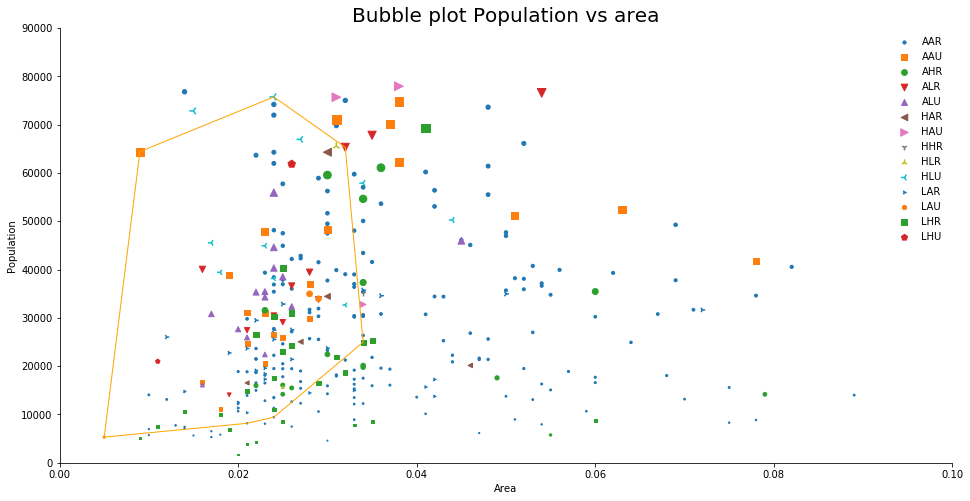

In [85]:
# Necesitamos importar la clase Convexhull para el encircling
from scipy.spatial import ConvexHull

# Instanciamos la figura
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) # Con esto ya tenemos la figura

# Preparamos datos
# En este caso necesitamos el total de la columna de población, la cual es la métrica que vamos a medir
size_total = data['poptotal'].sum()

# Queremos que cada grupo tenga un marcador distinto
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", 
           "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"] 

# Iteramos por todas las categoria, asignandole un color y marcador a cada una:
for cat, marker in zip(sorted(data['category'].unique()), markers):
    
    # filtramos el x e y para cada categoría
    ar = data[data['category']== cat]['area']
    pop = data[data['category']== cat]['poptotal']
    
    # Aqui calculamos el tamaño especifico de cata categoria
    size = pop/size_total # Mientras más grande esta proporción, más grande será el marcador
    
    # Gráficamos, especificando 's = size' y 'marker = marker' 
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker) # No es necesario que los markers sean tan locos

# A continuación, procedemos con enfatizar datos usando el encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

# 1. Filtrar grupo que queremos enfatizar, en este caso 'IN'
encircle_data = data[data['state']=='IN']

# 2. Obtenemos X e Y
encircle_x = encircle_data['area']
encircle_y = encircle_data['poptotal']

# 3. np.c_ concatena sobre el segundo eje
p = np.c_[encircle_x,encircle_y]

# 4. ConvexHull que importamos anteriormente, calcula los limites de un polígono
hull = ConvexHull(p)

# 5. Creamos un poligono con un color especifico con los datos de hull
poly = plt.Polygon(p[hull.vertices,:], ec = 'orange', fc = 'none')

# agregamos al gráfico
ax.add_patch(poly)

# Styling
# Eliminar spines
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# Axis Labels
ax.set_xlabel("Area")
ax.set_ylabel("Population")

# Limites de cada eje
ax.set_ylim(0, 90000) # Limites eje Y
ax.set_xlim(0, 0.1) # Limites eje X

# Titulo
ax.set_title('Bubble plot Population vs area', size = 20) # Titulo

# Leyenda, sin marco --> podemo eliminar ese argumento o simplemente asignarle True en el caso que eramos marco
ax.legend(loc = 'upper right', fontsize = 10, frameon=False) # Podemos sacarle el "Frame"

## Otro tipo de encircling:

[Volver a indice](#Indíce)

El proceso es muy similar al gráfico anterior

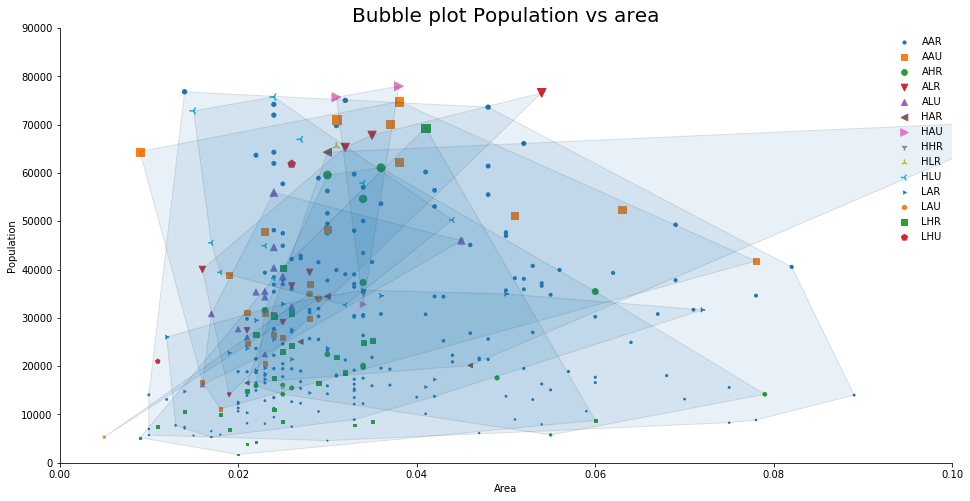

In [86]:
# Instanciamos la figura
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) # Con esto ya tenemos la figura

# Preparamos datos
# En este caso necesitamos el total de la columna de población, la cual es la métrica que vamos a medir
size_total = data['poptotal'].sum()

# Queremos que cada grupo tenga un marcador distinto
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", 
           "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"]

# En este caso crearemos una función que hará el encircling:
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

def encircle(x, y, ax = None, **kw):
    """ Toma los ejes, X e Y y dibuja los poligonos"""
    """Este codigo separa los diferente clusters"""
    
    # Si no entregamos el axis, lo obtenemos con 'gca' (get current axis)
    if not ax:
        ax = plt.gca()
    
    # Concatenamos X e Y
    p = np.c_[x, y]
    
    # Calculamos limites del polígono
    hull = ConvexHull(p)
    
    # Creamos polígono desde los vertices
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    
    # agregamos
    ax.add_patch(poly)

# Iteramos por todas las categoria, asignandole un color y marcador a cada una:
for cat, marker in zip(sorted(data['category'].unique()), markers):
    
    # filtramos el x e y para cada categoría
    ar = data[data['category']== cat]['area']
    pop = data[data['category']== cat]['poptotal']
    
    # Aqui calculamos el tamaño especifico de cata categoria
    size = pop/size_total # Mientras más grande esta proporción, más grande será el marcador
    
    # Gráficamos, especificando 's = size' y 'marker = marker' 
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker)
    
    # Agregamos el encircling en cada iteración
    try:
        # try to add a patch
        encircle(ar, pop, ec = "k", alpha=0.1)
    except:
        # if we don't have enough poins to encircle just pass
        pass

# Styling
# Eliminar spines
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# Axis Labels
ax.set_xlabel("Area")
ax.set_ylabel("Population")

# Limites de cada eje
ax.set_ylim(0, 90000) # Limites eje Y
ax.set_xlim(0, 0.1) # Limites eje X

# Titulo
ax.set_title('Bubble plot Population vs area', size = 20) # Titulo

# Leyenda, sin marco --> podemo eliminar ese argumento o simplemente asignarle True en el caso que eramos marco
ax.legend(loc = 'upper right', fontsize = 10, frameon=False) # Podemos sacarle el "Frame"

## Scatter plot con linea de regresión

[Volver a indice](#Indíce)

Si se desea comprender como cambian dos variables entre sí, la línea de mejor ajuste o 'best fit' es la mejor opción.

El siguiente gráfico muestra cómo la línea de mejor ajuste difiere entre varios grupos en los datos. Para deshabilitar las agrupaciones y solo dibujar una línea de mejor ajuste para todo el conjunto de datos, elimine el parámetro hue = 'cyl' de la llamada sns.lmplot () a continuación.

https://visual.ly/m/scatter-plots-regression-lines/

Text(0.5, 1, 'Scatter plot con línea de Best Fit')

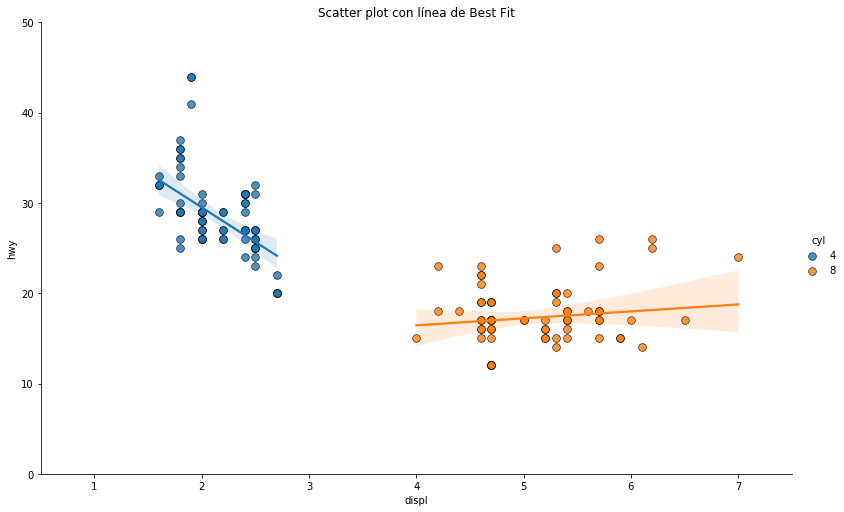

In [87]:
# Importamos seaborn
import seaborn as sns 

# Importamos datos
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
#seleccionamos datos
datos = data.loc[data['cyl'].isin([4,8]), :]

# Gráficamos usando seaborn
# Podemos omitir poner x = 'displ', podriamos colocar simplemente 'displ'
sns.lmplot(x = 'displ', y = 'hwy', data = datos, hue = 'cyl', 
          height=7, aspect=1.6, robust=True, palette='tab10',
          scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Seaborn utiliza matplotlib para sus visualizaciones, por los que podemos utilizar plt.gca y todos sus comandos
# Obtenemos ax actual en el que queremos trabajar
ax = plt.gca()

# cambiamos límites
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 50)

# Título
ax.set_title('Scatter plot con línea de Best Fit')

Realizamos el mismo gráfico, pero separamos cada uno en distintos axes

Text(0.5, 1, 'Scatter plot con línea de Best Fit')

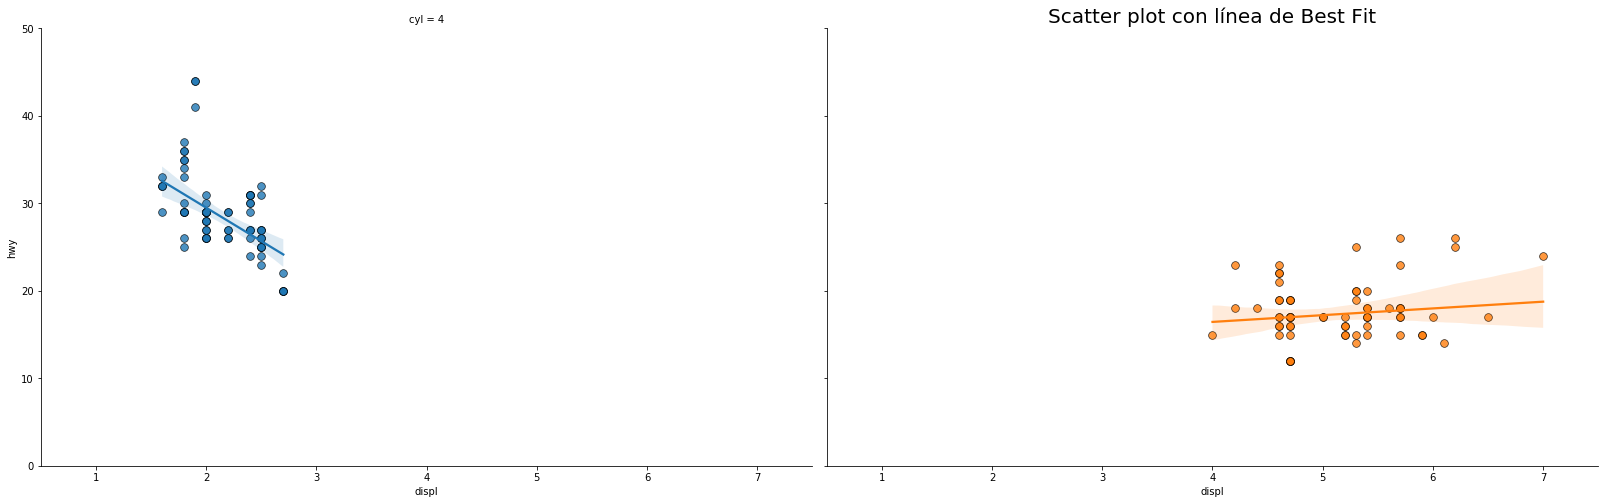

In [88]:
# Los datos ya están declarados en el gráfico anterior

# Gráficamos usando seaborn
# Podemos omitir poner x = 'displ', podriamos colocar simplemente 'displ'
# Especificando 'col' seaborn crea un gráfico por axes
axes = sns.lmplot(x = 'displ', y = 'hwy', data = datos, hue = 'cyl', col = 'cyl', 
                  height=7, aspect=1.6, robust=True, palette='tab10',
                  scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Seaborn utiliza matplotlib para sus visualizaciones, por los que podemos utilizar plt.gca y todos sus comandos
# Obtenemos ax actual en el que queremos trabajar
ax = plt.gca()

# cambiamos límites
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 50)

# Título
ax.set_title('Scatter plot con línea de Best Fit', size = 20)

## Count Plot

[Volver a indice](#Indíce)

Otra opción para evitar el problema de la superposición de puntos es aumentar el tamaño del punto en función de cuántos puntos se encuentran en ese punto. Entonces, cuanto mayor es el tamaño del punto, más es la concentración de puntos alrededor de eso.

Una de las variables es categórica

https://seaborn.pydata.org/generated/seaborn.stripplot.html

Text(0.5, 1.0, 'Count plot')

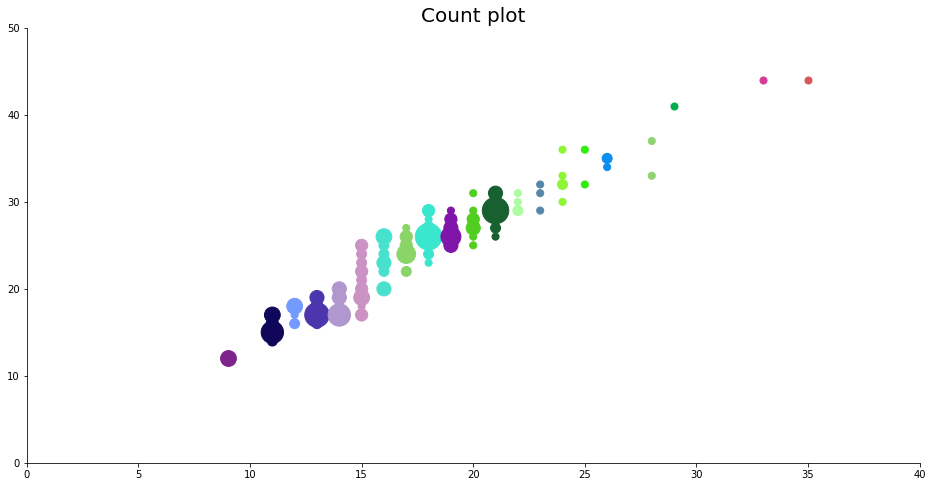

In [89]:
# Preparamos los datos para generar gráfico
# Necesitamos agrupar los datos por las variables de interés, en este caso 'cty' y 'hwy'
gb_df = data.groupby(['cty', 'hwy']).size().reset_index(name = 'counts')

# Ordenamos los valores, t
gb_df.sort_values(['cty', 'hwy', 'counts'], ascending = True, inplace = True)

# Creamos los colores para cada grupo con un dictionary comprehension
colors = {i:np.random.random(3,) for i in sorted(list(gb_df['cty'].unique()))} # Puedes revisar como queda este dict

# Instanciamos la figura

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 1, 1)

# Iteramos por cada grupo
for x in sorted(list(gb_df['cty'].unique())):
    
    # Obtenemos valores de X e Y
    x_values = gb_df[gb_df['cty'] == x]['cty']
    y_values = gb_df[gb_df['cty'] == x]['hwy']
    
    # Tamaño de cada grupo
    size = gb_df[gb_df['cty'] == x]['counts']
    
    # Color por grupo
    color = matplotlib.colors.rgb2hex(colors[x])
    
    # Plot
    ax.scatter(x = x_values, y = y_values, s = size*50, c = color)


# Styling
# Eliminar spines
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# Limites de cada eje
ax.set_ylim(0, 50) # Limites eje Y
ax.set_xlim(0, 40) # Limites eje X

# Titulo
ax.set_title('Count plot', size = 20) # Titulo

# Bar chart

[Volver a indice](#Indíce)

El gráfico de barras es una forma clásica de visualizar elementos basados ​​en recuentos o en cualquier métrica determinada. En la siguiente tabla, he usado un color diferente para cada artículo, pero es posible que desee elegir un color para todos los artículos a menos que los coloree por grupos. Los nombres de los colores se almacenan dentro de all_colors en el siguiente código. Puede cambiar el color de las barras configurando el parámetro de color en plt.plot ().

Representa datos categoricos con barras rectangulares donde la altura o largo indica su concentración

https://en.wikipedia.org/wiki/Bar_chart

Text(0.5, 1.0, 'Bar chart')

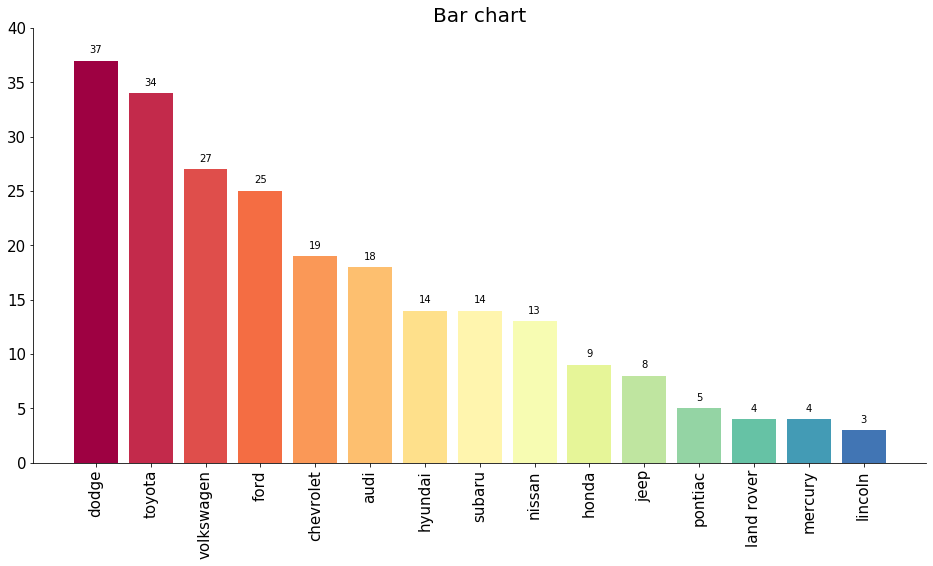

In [112]:
# Preparamos datos
# Trabajaremos con los productores de los vehiculos
# Los manufactureros serán nuestro X y el contador Y
d = data['manufacturer'].value_counts().to_dict() # to_dict nos transforma de inmediato los datos en un dict

# Creamos un color por manufacturero, esto es opcional, puedes ser un color.
colors = [plt.cm.Spectral(i/float(len(d.keys()))) for i in range(len(d.keys()))]

# Instanciamos figura

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(1, 1, 1)

ax.bar(d.keys(), d.values(), color = colors)

# Iteramos sobre cada X e Y para agregar el valor sobre la barra, esto es opcional

for i, (k, v) in enumerate(d.items()):
    ax.text(k, # donde colocar el texto en las coordenadas de X
           v + 1, # Donde colocar el texto en coordenadas  de Y
           v, # El texto
           color = 'black',
           fontsize = 10, # Tamaño de la letra
           horizontalalignment = 'center', # Centrar el texto
           verticalalignment = 'center') # centrar el texto
    
# Estética

# Modificamos tamaño de los valores en el eje X e Y, además de poder rotarlos
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)

# Modificamos limite del eje Y
ax.set_ylim(0, 40)

# Eliminar spines
ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# Título
ax.set_title('Bar chart', size = 20)

# Series de tiempo

[Volver a indice](#Indíce)

Las series de tiempo son utiilizadas para visualizar como una variable cambia con el avanced del tiempo. Trabajaremos con datos del tráfico aereo entre 1949 y 1969.

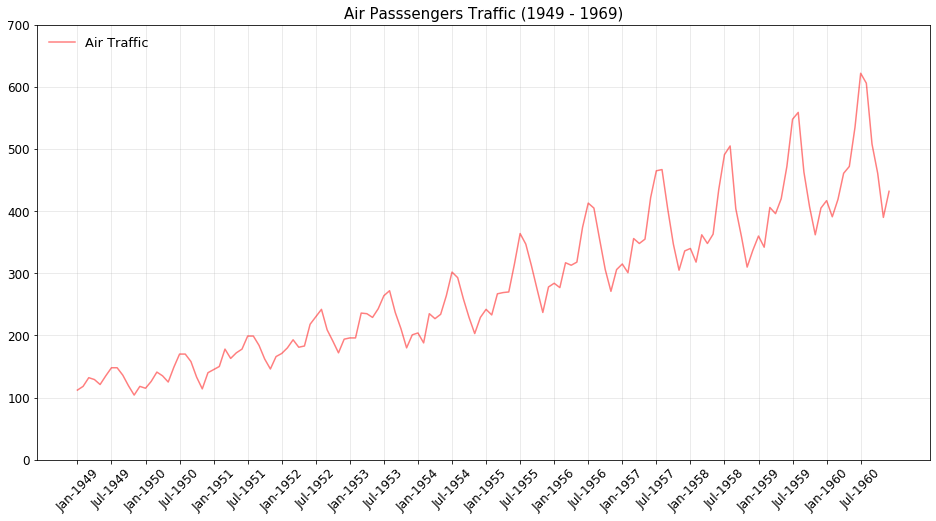

In [178]:
# Importamos datos
data = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
data.set_index('date', inplace = True)

# Definimos función que nos ayudará a trabajar con la columna de tiempo
def create_date_tick(df):
    """
    Convierte fechas con formato imestamp('1949-01-01 00:00:00') a formato 'Jan-1949'
    """
    
    df['date'] = pd.to_datetime(df.index) # Convertimos a fecha
    df['month_name'] = df['date'].dt.month_name() # Extraemos nombre de mes
    df['month_name'] = df['month_name'].apply(lambda x: x[:3]) # Deja solo los primeros 3 carácteres
    df['year'] = df['date'].dt.year # extraemos año
    df['new_date'] = df["month_name"].astype(str) + "-" + df["year"].astype(str)

# Ejecutamos función    
create_date_tick(data)

# Valores que cambian con el paso del tiempo, X es el index del DataFrame
y = data['value']

# Instanciamos figura
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(1, 1, 1)

# Gráficamos con .plot
ax.plot(y, color = 'red', alpha = 0.5, label = 'Air Traffic')

# Estilo
# Agregamos gridlines
ax.grid(alpha = 0.3)

# límite eje Y para que la info no esté muy encima
ax.set_ylim(0, 700)

# Agregar etiquetas al eje X e Y
xtick_location = data.index.tolist()[::6]
xtick_labels = data['new_date'].tolist()[::6]

# Vamos a hacer que las etiquetas del eje X sean cada 6 meses
ax.set_xticks(xtick_location)

# Usamos las etiquetas que hicimos con la función
ax.set_xticklabels(xtick_labels)

# change the size of the font of the x and y axis
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# Título y leyenda
ax.set_title("Air Passsengers Traffic (1949 - 1969)", fontsize = 15)
ax.legend(loc = "upper left", fontsize = 13, frameon = False)